* **Nombre:** Diego Fernando Pinzón López
* **Documento:** C.C 1.016.088.886
* **Teléfono:** 313 350 5547
* **Correo:** dfpinzonl@unal.edu.co

# Contenido
- [1 - Librerías](#1)
- [2 - Por qué código presentado no funciona](#2)
- [3 - Preguntas del proyecto](#3)
    - [Especificación de qué problema de Machine Learning está resolviendo](#ex-1)
    - [Corto resumen de las características y etiquetas que se están trabajando](#ex-2)
    - [Preguntas importantes:](#ex-3)
        - [a. ¿El dataset es linealmente separable?](#ex-4)
        - [b. ¿Se eligen estos conjuntos de datos al azar?](#ex-5)
        - [c. ¿El tamaño de muestra es suficiente para garantizar generalización?](#ex-6)
    - [Explicación sobre cómo y por qué el código funciona](#ex-7)
    - [Algunos ejemplos o ilustraciones de que el método funciona adecuadamente](#ex-8)
    - [Evidencia cuantitativa de generalización con el dataset proporcionado](#ex-9)

<a name='1'></a>
## 1 - Librerías

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns

style.use('ggplot')

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<a name='2'></a>
## 2 - Por qué código presentado no funciona

### Explicación del Código

In [2]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/

class Support_Vector_Machine:
    def __init__(self, visualization = True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
         # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification

In [ ]:
datos_1 = df[df['class']==1]
datos_0 = df[df['class']==0]
datos_1 = datos_1.drop(['class'], axis= 1)
datos_0 = datos_0.drop(['class'], axis= 1)

lista_mayor = []
for i in range(datos_1.shape[0]):
    lista_mayor.append([])
    for j in range(datos_1.shape[1]):
        fila = datos_1.iloc[i,j]
        lista_mayor[i].append(fila)

lista_mayor2 = []
for i in range(datos_0.shape[0]):
    lista_mayor2.append([])
    for j in range(datos_0.shape[1]):
        fila = datos_0.iloc[i,j]
        lista_mayor2[i

In [20]:
data_dict

{-1: array([[1, 7],
        [2, 8],
        [3, 8]]),
 1: array([[ 5,  1],
        [ 6, -1],
        [ 7,  3]])}

Optimized a step.
Optimized a step.
Optimized a step.


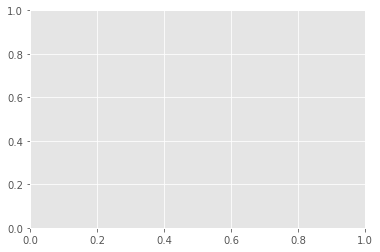

In [3]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit(data_dict)

### Conclusiones

Dadas las condiciones presentadas anteriormente con el código, se procederá a utlizar la librería sklearn, donde el código svm sí abarca generalidad.

<a name='3'></a>
## 3 - Preguntas del proyecto

Modificar ruta donde guardará el archivo de txt:

In [4]:
os.chdir(r'C:\Users\Lenovo\Documents\Maestría Matemática Aplicada\Matemáticas del Aprendizaje de Máquina')

In [5]:
base = pd.read_csv('data_banknote_authentication.txt'
                  ,header = None)
base.columns = ['variance'
               ,'skewness'
               ,'curtosis'
               ,'entropy'
               ,'class']

conjunto de datos de autenticación de billetes.

In [6]:
print(f'Para esta parte del proyecto, se cuenta con un total de {base.shape[0]} datos acompañados por {base.shape[1]-1} variables y 1 label.')

Para esta parte del proyecto, se cuenta con un total de 1372 datos acompañados por 4 variables y 1 label.


<a name='ex-1'></a>
### Especificación de qué problema de Machine Learning está resolviendo

Inicialmente se cuenta con un dataset que incluye cuatro características numéricas: variance, skewness, curtosis y entropy, y una variable de clase que indica si el billete es verdadero o falso. El problema que se quiere resolver es el de clasificación de billetes como auténticos o falsos, cuyo objetivo es entrenar un modelo de Machine Learning capaz de clasificar los billetes como verdaderos o falsos, con base en las características numéricas anteriormente mencionadas. 

Se puede utilizar para este caso los algoritmos de clasificación como regresión logístic ó SVM.

<a name='ex-2'></a>
### Corto resumen de las características y etiquetas que se están trabajando

Una breve descripción de la base de los 1.372 datos, se muestra a continuación en el siguiente dataframe

In [7]:
base.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Se muestra inicialmente que la información consiste en variables numéricas continuas con valores negativos y positivos.

Se aprecia que la variable 'skewness' es la que cuenta con la mayor desviación estandar; por lo que la información es más dispersa para esta variable; mientras que la variable 'entropy' es la que cuenta con la información mas agrupada que el resto, dado que su desviación estandar es la menor. Por otro lado, se ve que la variable 'entropy' también cuenta con el menor valor de la media.

Se aprecia además que en el dataset no cuenta con valures nulos

In [8]:
base.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

La variable **variance** se muestra centrada en 0, con una participación considerable entre -3 y 3 entre sus datos. Además la distribución información se puede apreciar incialmente como simétrica y normal. 

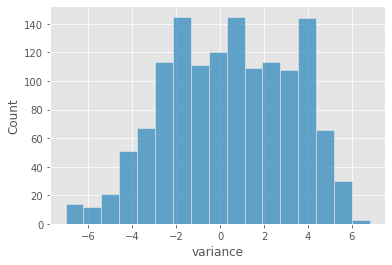

In [9]:
sns.histplot(base['variance'])
plt.show()

La variable **skewness** se muestra centrada en 0, con una participación considerable entre -5 y 10 entre sus datos. Además la distribución información se puede apreciar incialmente asimétrica y con una propensión a tener más datos positivos que negativos. 

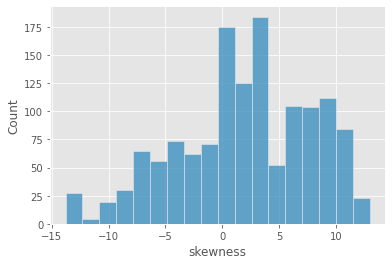

In [10]:
sns.histplot(base['skewness'])
plt.show()

La variable **curtosis** se muestra centrada en 0, con una participación considerable entre -5 y 5 entre sus datos. Además la distribución información se puede apreciar incialmente asimétrica y con una propensión a tener más datos negativos que positivos. 

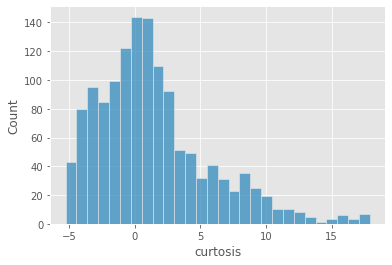

In [11]:
sns.histplot(base['curtosis'])
plt.show()

La variable **entropy** se muestra centrada en 0, con una participación considerable entre -5 y 5 entre sus datos. Además la distribución información se puede apreciar incialmente asimétrica y con una propensión a tener más datos positivos que negativos, con un sesgo a derecha más fuerte que el presentado en la variable **skewness**. 

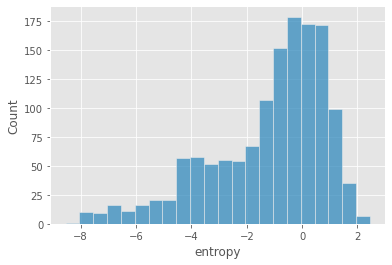

In [12]:
sns.histplot(base['entropy'])
plt.show()

Por último, el dataset nos muestra que en su variable **class**, se cuenta con una participación muy similar en cuanto a los billetes falsos (762 datos que representan el 55,54% de los datos) y los billetes verdaderos (610 datos que representan el 44,64% de los datos).

In [13]:
class_counts

NameError: name 'class_counts' is not defined

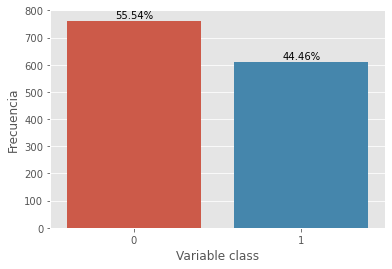

In [14]:
class_counts = base['class'].value_counts()

# calcular el porcentaje de cada clase
class_percentages = class_counts / len(base) * 100

# trazar el gráfico de barras utilizando seaborn
sns.barplot(x = class_counts.index
           ,y = class_counts.values)

# añadir etiquetas de los ejes y el título del gráfico
plt.xlabel('Variable class')
plt.ylabel('Frecuencia')

for i, v in enumerate(class_counts.values):
    plt.text(i, v + 10, f'{class_percentages[i]:.2f}%', ha='center')

# mostrar el gráfico
plt.show()

<a name='ex-3'></a>
### Preguntas importantes:

<a name='ex-4'></a>
#### a. ¿El dataset es linealmente separable?

A continuación graficamos un diagrama de dispersión 1 a 1 con cada una de las variables continuas, agregando la clase 0 y 1.

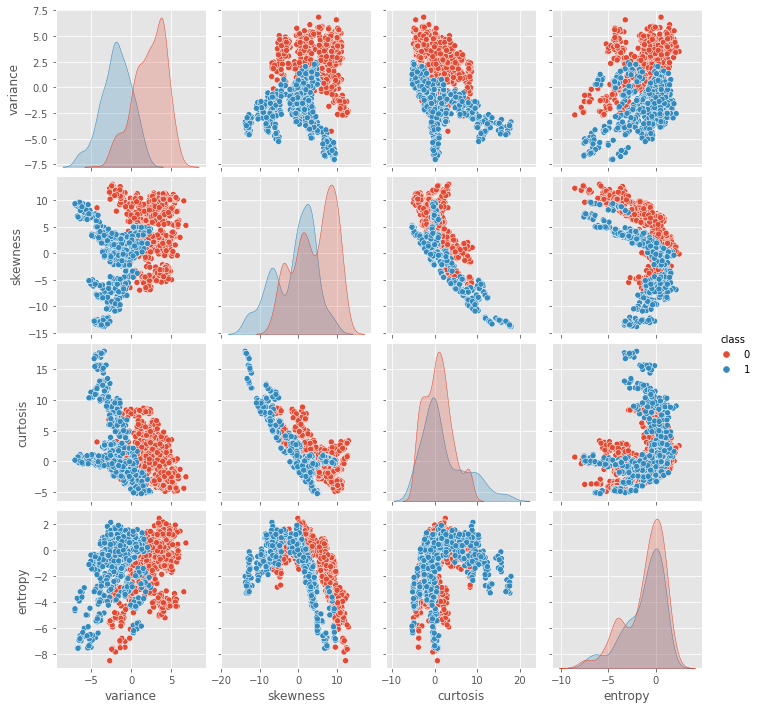

In [15]:
# Crear el diagrama de dispersión
sns.pairplot(base, vars = ['variance'
                          ,'skewness'
                          ,'curtosis'
                          ,'entropy']
            ,hue='class')

Dentro del pairplot se evidencia como en varios de los casos se muestra la separación clara de los datos de class 0 y los datos de class 1; por lo que visualmente se podría afirmar que el dataset es linealmente separable.

Cabe aclarar que una forma alterna de demostrar que es linealmente separable es con el desempeño del modelo SVM; por lo que más adelante veremos que en efecto la base sí es linealmente separable.

<a name='ex-5'></a>
#### b. ¿Se eligen estos conjuntos de datos al azar?

Para efectos de entrenamiento del modelo, lo más importante es elegir aleatoriamente el conjunto de datos con el fin de que no haya ningún tipo de sesgo a la hora de entrenar un modelo. De igual forma, esto nos permite evaluar si el modelo puede llegar a generalizar y comportarse bien sobre nuevos datos.

<a name='ex-6'></a>
#### c. ¿El tamaño de muestra es suficiente para garantizar generalización?

Siempre es recomendado usar utilizar conjuntos de datos lo suficientemente grandes como para garantizar la capacidad de generalización del modelo. Sin embargo, asumiendo que la muestra fue seleccionada de manera adecuada, este conjunto de datos es una muestra representativa, ya que en estadística, si se quisiera una muestra para evaluar un determinado experimento con un 95% de nivel de confianza y un margen de error del 3%, se requieren 1.068 datos aproximadamente.

<a name='ex-7'></a>
### Explicación sobre cómo y por qué el código funciona

<a name='ex-8'></a>
### Algunos ejemplos o ilustraciones de que el método funciona adecuadamente

Insertemos el código svm

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Aquí se separan las variables predictoras (X) y la variable objetivo (y)
X = base[['variance', 'skewness', 'curtosis', 'entropy']]
y = base['class']

# Dividir el dataset en datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X
                                                   ,y
                                                   ,test_size = 0.3
                                                   ,random_state = 42)

# Entrenar el modelo SVM
modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = modelo_svm.predict(X_test)

Para evaluar que en efecto el modelo funcina, evaluamos la matriz de confusión:

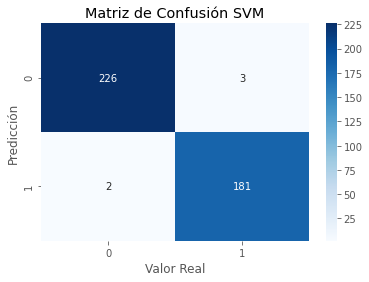

In [17]:
# Obtener la matriz de confusión y graficarla con Seaborn
matriz_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusion
           ,fmt = 'd' 
           ,annot = True
           ,cmap = 'Blues')

plt.title("Matriz de Confusión SVM")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.show()

Aquí, esta matriz de confusión, que hacen referencia al desempeño del modelo entrenado con el train_set, evaluado en el test_set.
Por un lado muestra en la posición (1,1) los verdaderos positivos que son los que sabemos que son positivos y que el modelo lo predijo así. Aquí vemos que el modelo evaluó bien 226 datos. Mientras que en la posición (2,2) que son los verdaderos negativos, que son los que sabemos que son negativos y que el modelo lo predijo así. Aquí vemos que el modelo evaluó bien 181 datos
Por otro lado muestra en la posición (2,1) y (1,2) los falsos positivos y falsos negativos respectivamente, que evidencian equivocación sobre 3 + 2 datos mal clasificados.

Se aprecia cómo el modelo precisa correctamente en 407 de los 412 datos del grupo de testeo.

<a name='ex-9'></a>
### Evidencia cuantitativa de generalización con el dataset proporcionado

Para este caso, vamos a realizar un entrenamiento con la librería sklearn, donde extraeremos los modelos de Support Vector Machine y Logistic Regression, con el fin de revisar algunas de las siguientes métricas:

- **Exactitud (Accuracy):** es una métrica comúnmente utilizada para evaluar la precisión de un modelo de aprendizaje automático. El accuracy se define como la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones realizadas ((TP+TN)/(TP+FP+TN+FN)).
- **Precisión (precision):** mide la proporción de verdaderos positivos (TP) entre todos los valores predichos positivos (TP + FP). Es una medida de la capacidad del modelo para identificar correctamente los verdaderos positivos y minimizar los falsos positivos.

- **Sensibilidad o Recall (recall):** mide la proporción de verdaderos positivos (TP) entre todos los valores verdaderos positivos y falsos negativos (TP + FN). Es una medida de la capacidad del modelo para identificar correctamente los verdaderos positivos y minimizar los falsos negativos.

- **F1-score:** es una medida que combina la precisión y la sensibilidad en una sola métrica. Cuanto más cercano a 1, mejor es el rendimiento del modelo (2*recall/precision/(recall+precision)).

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X = base[['variance'
         ,'skewness'
         ,'curtosis'
         ,'entropy']]
y = base['class']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X
                                                   ,y
                                                   ,test_size = 0.2
                                                   ,random_state = 42)
# Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1_score = f1_score(y_test, logreg_pred)
logreg_auc_roc = roc_auc_score(y_test, logreg_pred)

# Support Vector Machine

y_train.replace(0
               ,-1
               ,inplace = True)
y_test.replace(0
              ,-1
              ,inplace = True)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred)
svm_auc_roc = roc_auc_score(y_test, svm_pred)

# Construir el DataFrame con los resultados
resultados = pd.DataFrame({'Accuracy': [svm_accuracy, logreg_accuracy]
                          ,'Precision': [svm_precision, logreg_precision]
                          ,'Recall': [svm_recall, logreg_recall]
                          ,'F1-score': [svm_f1_score, logreg_f1_score]
                          ,'AUC-ROC': [svm_auc_roc, logreg_auc_roc]}
                          index = ['SVM'
                                  ,'Regresión Logística'])

In [19]:
resultados

,Accuracy,Precision,Recall,F1-score,AUC-ROC
SVM,0.987864,0.983696,0.989071,0.986376,0.987985
Regresión Logística,0.987864,0.983696,0.989071,0.986376,0.987985


En lo que se aprecia en el dataframe 'resultados', se puede observar un desempeño bastante bueno en cuanto a las predicciones del modelo. En todas sus métricas, tanto en svm como en Regression Logistica, se ve que el 98% de los nuevos registros evaluados (con el X_test, y_test) fuer on predichos correctamente; por lo que se evidencia cuantitativamente que el modelo está generalizando correctamente.